In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
#1
reviews_csv = "Reviews.csv"
csv_file = pd.read_csv(reviews_csv)
csv_file = csv_file[:10000]

df = csv_file.loc[:,['UserId','ProfileName','Score']]

col = csv_file.iloc[:,2]
col = col.drop_duplicates()
col = col.sort_values(ascending=False)
score_count = csv_file.groupby(['UserId']).size()[col]

result_1 = score_count.sort_values(ascending=False)[:10]
result_1 = result_1.to_frame()
result_1.reset_index(inplace=True)
result_1.rename(columns={0:'Score_Count'},inplace=True)
result_id = result_1.iloc[:,0]

col_name = result_1.columns.tolist()
col_name.insert(3,'Score_mean')
col_name.insert(1,'ProfileName')
result_1 = result_1.reindex(columns=col_name)

for cnt in range(len(result_id)):    
    mask = df['UserId'] == result_id[cnt]
    result_1.iloc[cnt, 3] = df[mask].loc[:,'Score'].mean()
    result_1.iloc[cnt, 1] = df[mask].iloc[0,1]

In [216]:
result_1

,UserId,ProfileName,Score_Count,Score_mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


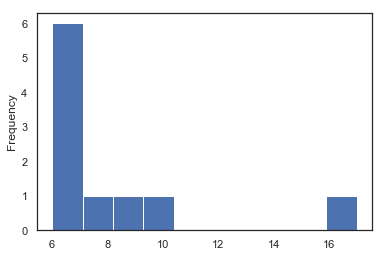

In [217]:
#2
result_1['Score_Count'].plot.hist()

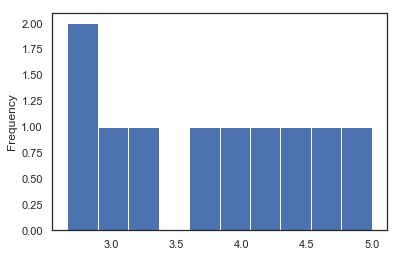

In [218]:
result_1['Score_mean'].plot.hist()

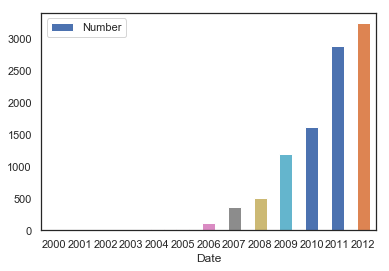

In [219]:
#3
time_slice = csv_file.loc[:,['Time']]
time_slice.columns = ['Date']
col_name = time_slice.columns.tolist()
col_name.insert(2,'Number')
time_slice = time_slice.reindex(columns=col_name)
time_slice['Number'] = 1

time_slice['Date'] = pd.to_datetime(time_slice['Date'], unit='s')
time_slice = time_slice.set_index('Date')
time_slice = time_slice.resample('AS').sum()

time_slice.reset_index(inplace=True)
for cnt in range(len(time_slice['Date'])):
    time_slice.iloc[cnt, 0] = str(2000+cnt)

time_slice.plot.bar(x='Date', y='Number', rot=0)

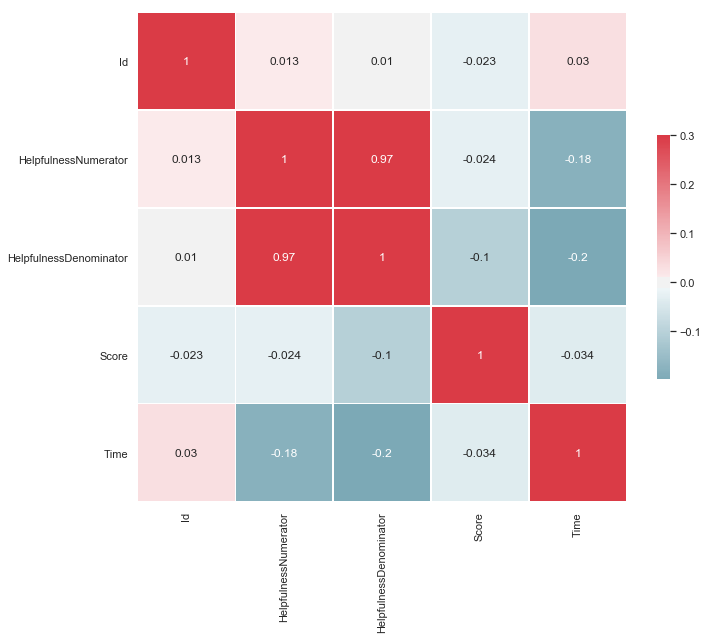

In [220]:
#4
df = csv_file.loc[:,['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']]
corr = df.corr()

sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

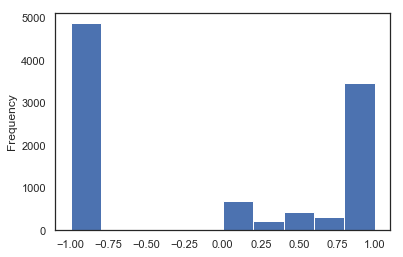

In [222]:
#5
helpful = csv_file.loc[:,['HelpfulnessNumerator','HelpfulnessDenominator']]
col_name = helpful.columns.tolist()
col_name.insert(2,'Ratio')
helpful = helpful.reindex(columns=col_name)

mask = helpful['HelpfulnessNumerator']<=helpful['HelpfulnessDenominator']
helpful = helpful[mask]

helpful['Ratio'] = -1
mask = (helpful['HelpfulnessNumerator']!=0) | (helpful['HelpfulnessDenominator']!=0)

for cnt in range(len(helpful)):
    if mask[cnt]:
        helpful.iloc[cnt, 2] = helpful.iloc[cnt, 0]/helpful.iloc[cnt, 1]
        
helpful['Ratio'].plot.hist()
